<a href="https://colab.research.google.com/github/hvr2026/CMPE-255-Assignment-2-LOW-CODE-ASSIGNMENTS-PART-2---pycaret-low-code-tasks/blob/main/AssociationRulesMining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip install pycaret
!pip install mlxtend
!pip install matplotlib
!pip install seaborn

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 2.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 46.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 50.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━

In [15]:

import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from pycaret.datasets import get_data
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D



In [11]:

data = get_data('germany')

basket = (data
          .groupby(['InvoiceNo', 'Description'])['Description']
          .count().unstack().reset_index().fillna(0)
          .set_index('InvoiceNo'))




,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536527,22809,SET OF 6 T-LIGHTS SANTA,6,12/1/2010 13:04,2.95,12662,Germany
1,536527,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,6,12/1/2010 13:04,2.55,12662,Germany
2,536527,84945,MULTI COLOUR SILVER T-LIGHT HOLDER,12,12/1/2010 13:04,0.85,12662,Germany
3,536527,22242,5 HOOK HANGER MAGIC TOADSTOOL,12,12/1/2010 13:04,1.65,12662,Germany
4,536527,22244,3 HOOK HANGER MAGIC GARDEN,12,12/1/2010 13:04,1.95,12662,Germany


In [12]:
basket = basket.applymap(lambda x: 1 if x > 0 else 0)





In [13]:
frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="support", min_threshold=0.01)




In [17]:
print("Shape of rules:", rules.shape)
print(rules.head())




Shape of rules: (10846, 10)
                antecedents                      consequents  \
0                 (POSTAGE)             ( DOLLY GIRL BEAKER)   
1      ( DOLLY GIRL BEAKER)                        (POSTAGE)   
2                 (POSTAGE)         (10 COLOUR SPACEBOY PEN)   
3  (10 COLOUR SPACEBOY PEN)                        (POSTAGE)   
4                 (POSTAGE)  (12 PENCIL SMALL TUBE WOODLAND)   

   antecedent support  consequent support   support  confidence      lift  \
0            0.635158            0.011609  0.011609    0.018277  1.574413   
1            0.011609            0.635158  0.011609    1.000000  1.574413   
2            0.635158            0.018242  0.018242    0.028721  1.574413   
3            0.018242            0.635158  0.018242    1.000000  1.574413   
4            0.635158            0.016584  0.013267    0.020888  1.259530   

   leverage  conviction  zhangs_metric  
0  0.004235    1.006792       1.000000  
1  0.004235         inf       0.369128  
2

In [18]:
def save_model(data, model_name):
    joblib.dump(data, f"{model_name}.pkl")
    print(f"Model saved as '{model_name}.pkl'")

save_model(rules, 'association_rules')

Model saved as 'association_rules.pkl'


Model saved as 'frequent_itemsets.pkl'


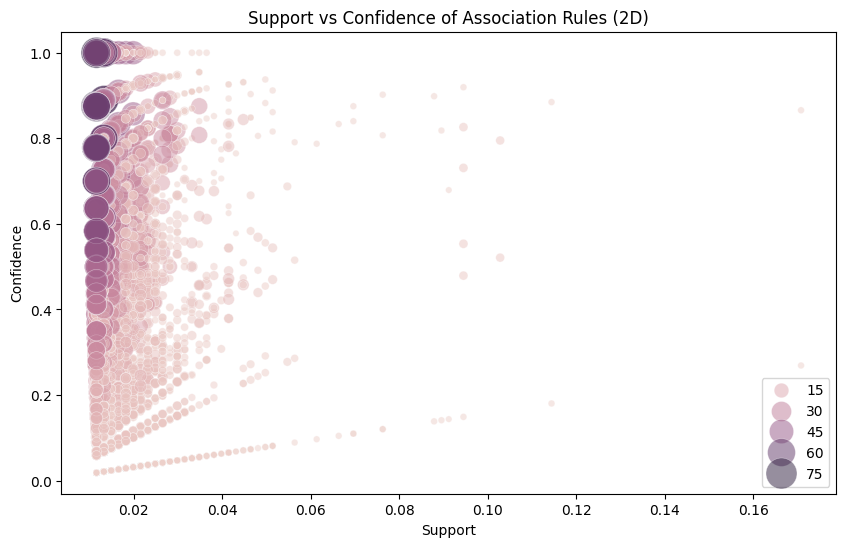

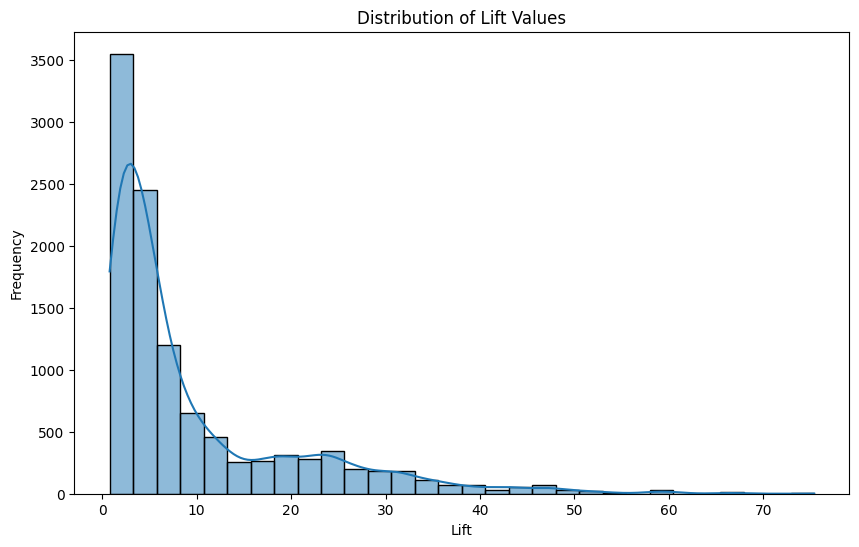

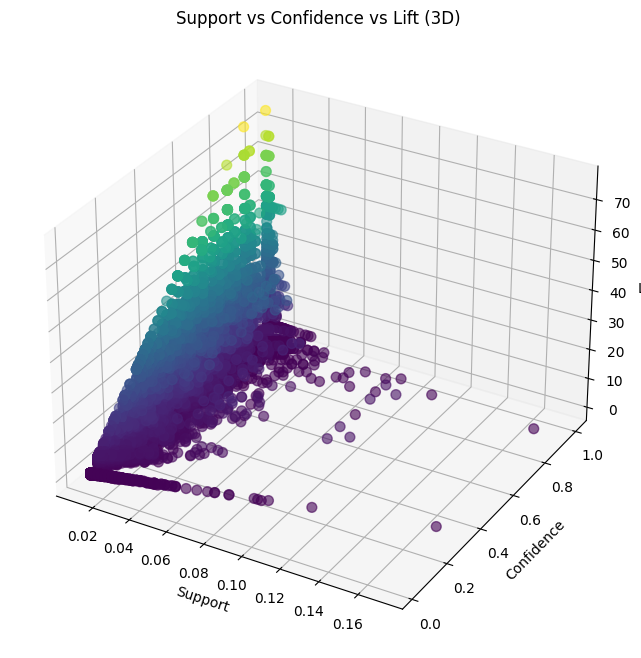

In [21]:

save_model(frequent_itemsets, 'frequent_itemsets')

def plot_support_vs_confidence(rules):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=rules, x='support', y='confidence', size='lift', hue='lift', sizes=(20, 500), alpha=0.5)
    plt.title('Support vs Confidence of Association Rules')
    plt.xlabel('Support')
    plt.ylabel('Confidence')
    plt.legend()
    plt.show()

def plot_lift_distribution(rules):
    plt.figure(figsize=(10, 6))
    sns.histplot(rules['lift'], bins=30, kde=True)
    plt.title('Distribution of Lift Values')
    plt.xlabel('Lift')
    plt.ylabel('Frequency')
    plt.show()


def plot_support_vs_confidence(rules):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=rules, x='support', y='confidence', size='lift', hue='lift', sizes=(20, 500), alpha=0.5)
    plt.title('Support vs Confidence of Association Rules (2D)')
    plt.xlabel('Support')
    plt.ylabel('Confidence')
    plt.legend()
    plt.show()


plot_support_vs_confidence(rules)
plot_lift_distribution(rules)
plot_support_vs_confidence_3d(rules)

